In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
bank_df = pd.read_csv('bank-full.csv', sep=';', lineterminator='\n')
#bank_df.to_csv('bank_formatted.csv')

In [3]:
bank_df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


#### EDA

In [4]:
unknown_count=(bank_df['job']=='unknown').sum() 
unknown_count

288

In [5]:
for column in bank_df:
    unknown_count = 0
    unknown_count=(bank_df[column]=='unknown').sum() 
    print(f'{column} {unknown_count}')

age 0
job 288
marital 0
education 1857
default 0
balance 0
housing 0
loan 0
contact 13020
day 0
month 0
duration 0
campaign 0
pdays 0
previous 0
poutcome 36959
y 0


In [106]:
bank_df = bank_df[bank_df['job'] != 'unknown']

In [107]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [108]:
bank_df.to_csv('bank_df_filtered.csv')

In [109]:
bank_df_filtered = pd.read_csv('bank_df_filtered.csv')

In [110]:
bank_df_filtered.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [111]:
bank_df_filtered.head(4)

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no


Text(0.5, 0, 'y')

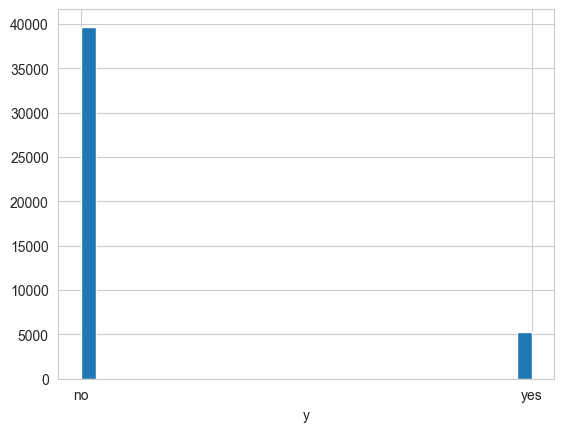

In [112]:
sns.set_style('whitegrid')
bank_df_filtered['y'].hist(bins=30)
plt.xlabel('y')

Text(0.5, 0, 'loan')

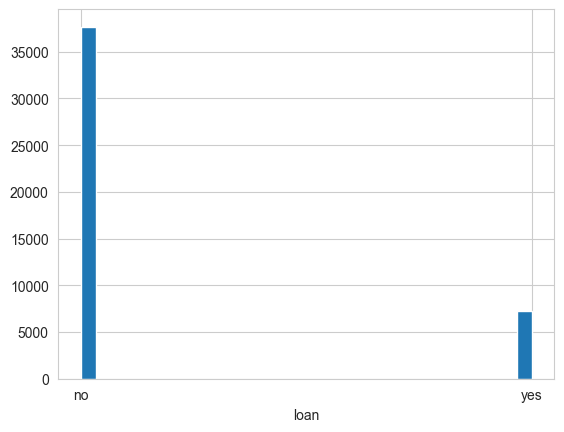

In [113]:
sns.set_style('whitegrid')
bank_df_filtered['loan'].hist(bins=30)
plt.xlabel('loan')

Text(0.5, 0, 'default')

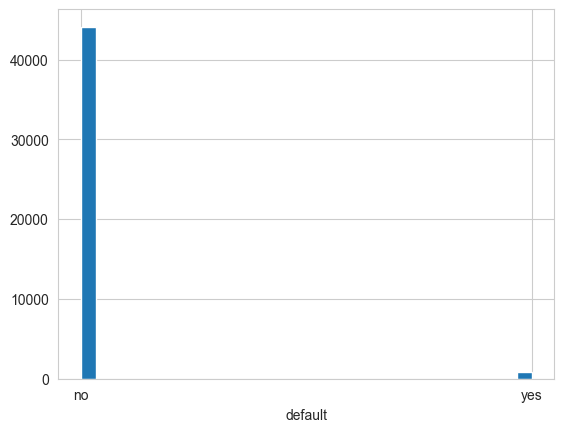

In [114]:
sns.set_style('whitegrid')
bank_df_filtered['default'].hist(bins=30)
plt.xlabel('default')

Text(0.5, 0, 'marital')

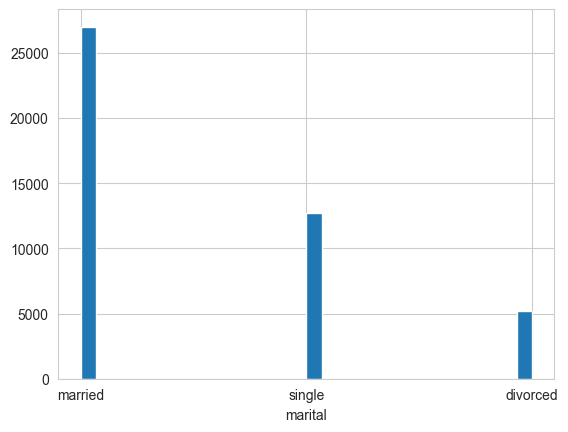

In [115]:
sns.set_style('whitegrid')
bank_df_filtered['marital'].hist(bins=30)
plt.xlabel('marital')

In [116]:
bank_df_filtered['housing'].unique()

array(['yes', 'no'], dtype=object)

Text(0.5, 0, 'housing')

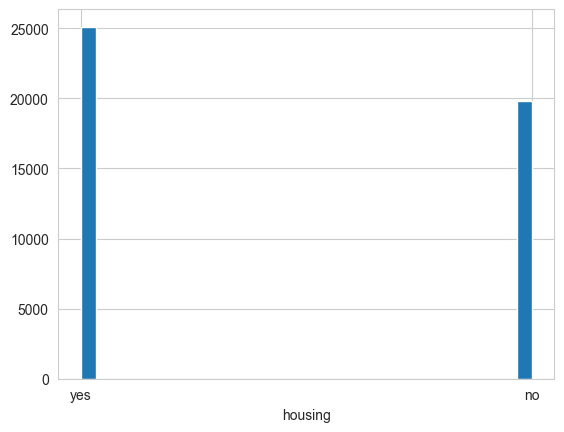

In [117]:
sns.set_style('whitegrid')
bank_df_filtered['housing'].hist(bins=30)
plt.xlabel('housing')

Text(0.5, 0, 'contact')

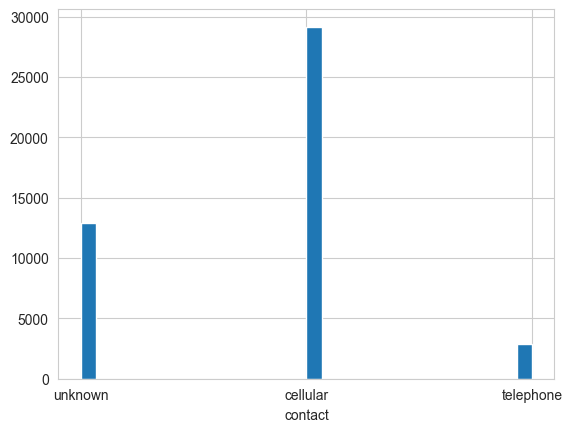

In [118]:
sns.set_style('whitegrid')
bank_df_filtered['contact'].hist(bins=30)
plt.xlabel('contact')

Text(0.5, 0, 'duration')

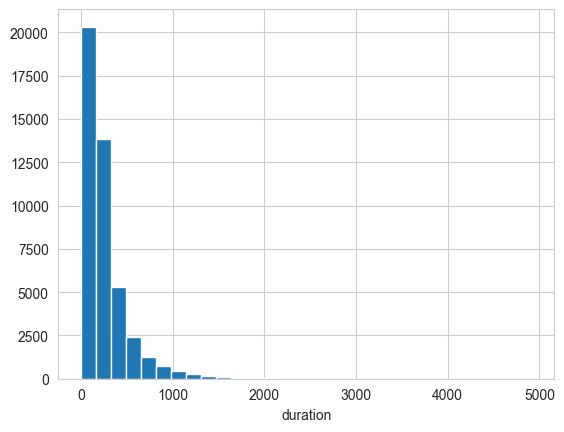

In [119]:
sns.set_style('whitegrid')
bank_df_filtered['duration'].hist(bins=30)
plt.xlabel('duration')

Text(0.5, 0, 'poutcome')

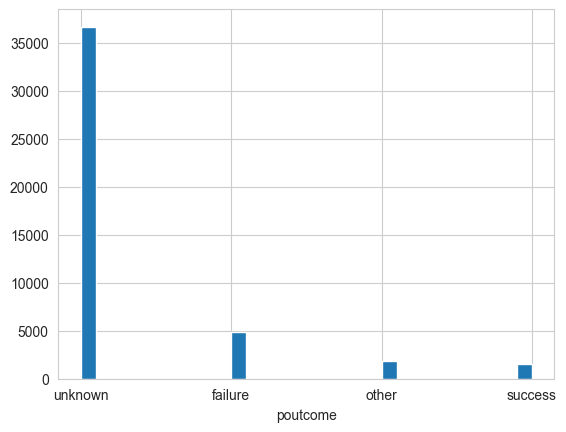

In [120]:
sns.set_style('whitegrid')
bank_df_filtered['poutcome'].hist(bins=30)
plt.xlabel('poutcome')

Text(0.5, 0, 'previous')

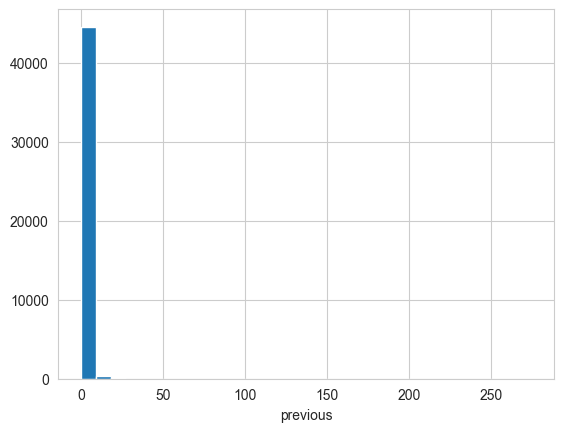

In [121]:
sns.set_style('whitegrid')
bank_df_filtered['previous'].hist(bins=30)
plt.xlabel('previous')

In [122]:
bank_df_filtered.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,44923.000000,44923.000000,44923.000000,44923.000000,44923.000000,44923.000000,44923.000000,44923.000000
mean,22610.540970,40.893529,1359.643011,15.813882,258.294838,2.760345,40.321016,0.581996
std,13052.936552,10.604399,3045.091520,8.320040,257.713770,3.092838,100.255146,2.309077
min,0.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11310.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22637.000000,39.000000,447.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33916.500000,48.000000,1421.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Visualization

Text(0.5, 0, 'age')

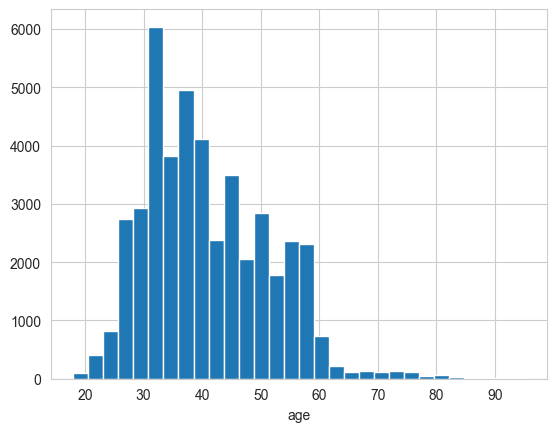

In [123]:
sns.set_style('whitegrid')
bank_df_filtered['age'].hist(bins=30)
plt.xlabel('age')

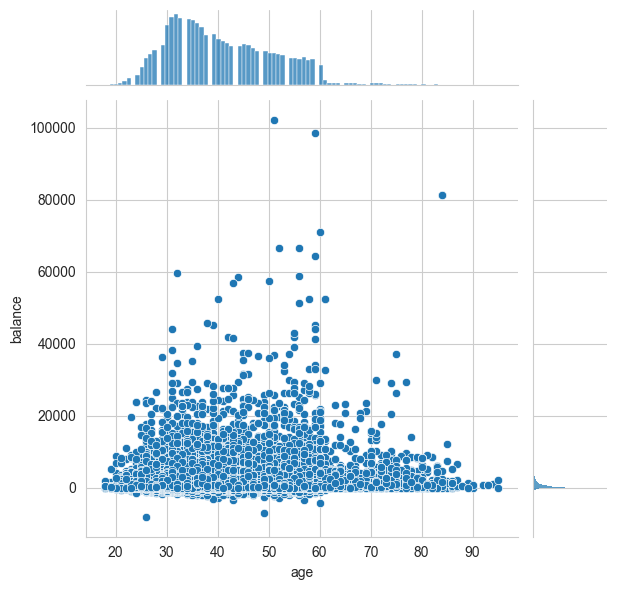

In [124]:
sns.jointplot(x='age',y='balance',data=bank_df_filtered)

In [125]:
#sns.jointplot(x='age',y='duration',data=bank_df_filtered,color='red',kind='kde')

In [126]:
#sns.pairplot(bank_df_filtered,hue='y',palette='bwr')

#### Logistic Regression

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
bank_df_filtered['default'] = bank_df_filtered['default'].map({'yes': 1, 'no': 0})
bank_df_filtered['housing'] = bank_df_filtered['housing'].map({'yes': 1, 'no': 0})
bank_df_filtered['loan'] = bank_df_filtered['loan'].map({'yes': 1, 'no': 0})
bank_df_filtered['y'] = bank_df_filtered['y'].map({'unknown':9,'yes': 1, 'no': 0})  

In [129]:
bank_df_filtered['marital'] = bank_df_filtered['marital'].map({'single':1,'married': 1, 'divorced': 2})  

In [130]:
bank_df_filtered['job'] = bank_df_filtered['job'].map({'management':1,'technician': 2, 'entrepreneur': 3,'blue-collar':3,'retired':4,'admin.':5,'services':6,'self-employed':7,'unemployed':8,'housemaid':9,'student':10 })  

In [131]:
bank_df_filtered['education'] = bank_df_filtered['education'].map({'tertiary':1,'secondary': 2, 'primary': 3,'unknown':9})  

In [132]:
bank_df_filtered['contact'] = bank_df_filtered['contact'].map({'cellular':1,'telephone': 2, 'unknown': 9})  

In [133]:
bank_df_filtered['poutcome'] = bank_df_filtered['poutcome'].map({'failure':1,'success': 2,'other':3, 'unknown': 9})  

In [134]:
bank_df_filtered['month'] = bank_df_filtered['month'].map({'jan':1,'feb': 2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'oct':10,'nov':11,'dec':12})  

In [135]:
def age_categories():
    age_thresholds=bank_df_filtered['age']
    for age in age_thresholds:
        if age>0 and age <40:
            bank_df_filtered['age_category'] = 1
        elif age>40 and age <60:
            bank_df_filtered['age_category'] = 2
        elif age>60:
            bank_df_filtered['age_category'] = 3
age_categories()

In [136]:
bank_df_filtered.head(1)

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_category
0,0,58,1,1,1,0,2143,1,0,9,5,5.0,261,1,-1,0,9,0,1


In [137]:
#bank_df_filtered.to_csv('final_dataset.csv')

In [138]:
bank_df_filtered['month'].unique()

array([ 5.,  6.,  7.,  8., 10., 11., 12.,  1.,  2.,  3.,  4., nan])

In [139]:
bank_df_filtered.isna().sum()

Unnamed: 0        0
age               0
job               0
marital           0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month           570
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
age_category      0
dtype: int64

In [140]:
bank_df_filtered.to_csv('final_dataset.csv')

## Technique to remove imbalance
### Oversampling 


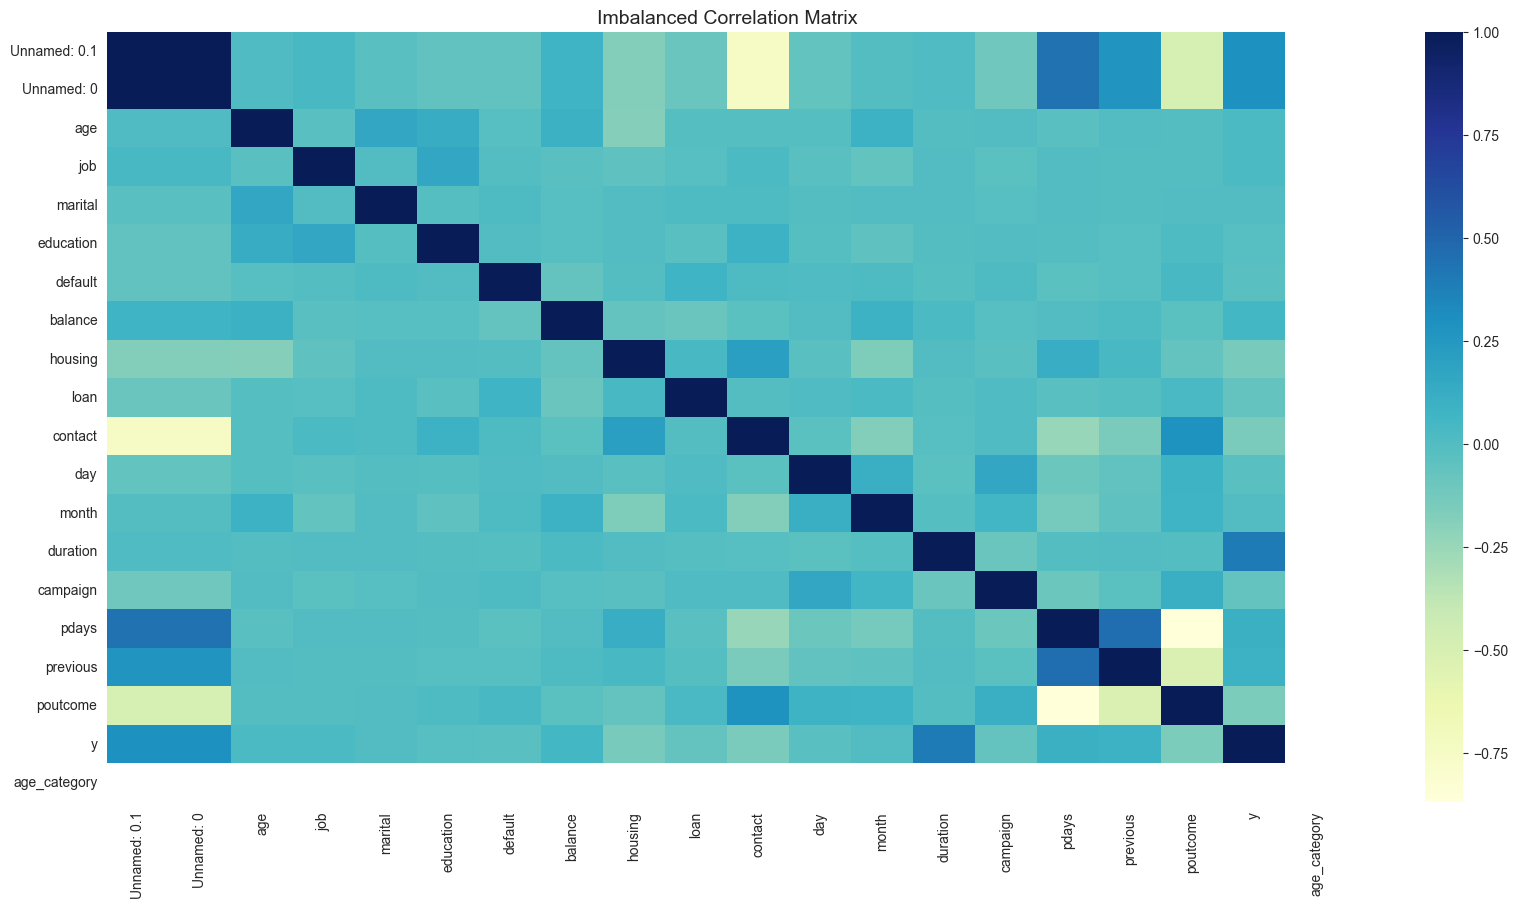

Index(['Unnamed: 0.1', 'Unnamed: 0', 'age', 'job', 'marital', 'education',
       'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y',
       'age_category'],
      dtype='object')

In [141]:
#pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
final_dataset = pd.read_csv('final_dataset.csv')
final_dataset.head(1)
X=final_dataset[['age','job','marital','education','default','balance','housing','loan','contact','day','duration','campaign','pdays','previous','poutcome']]
y = final_dataset['y']
smote = SMOTE(sampling_strategy='minority',random_state=7)
X_resampled, y_resampled = smote.fit_resample(X, y)
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = final_dataset.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()
oversampled_train = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
oversampled_train.head(1)
oversampled_train.to_csv('oversampled_train.csv')
final_dataset.shape
final_dataset.columns

In [158]:
final_dataset['age'].head(5)

0    58
1    44
2    33
3    47
4    35
Name: age, dtype: int64

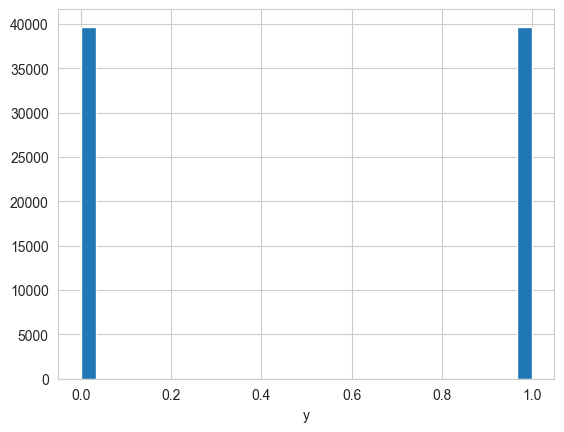

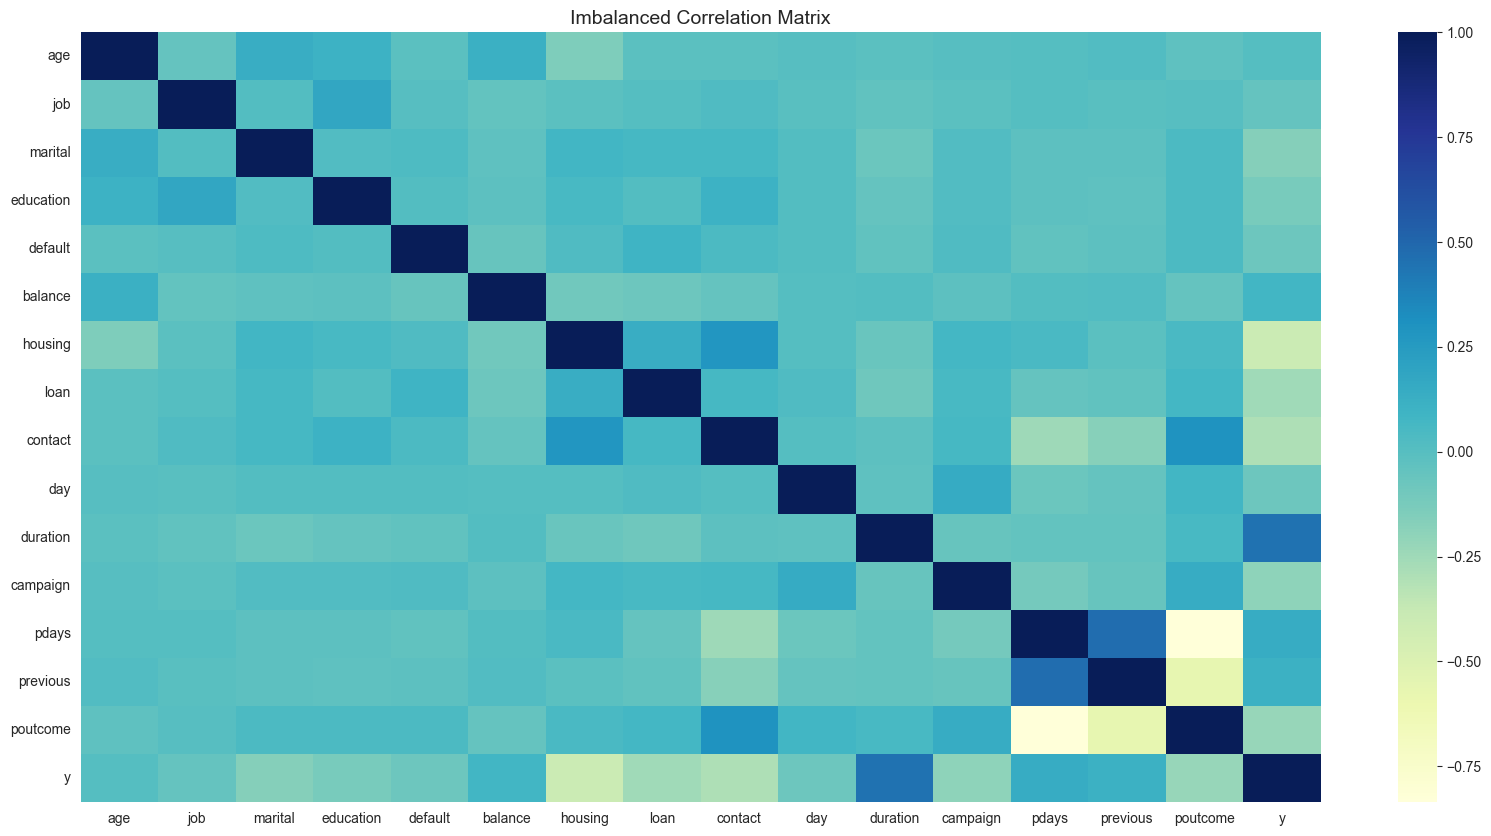

In [142]:
oversampled_train.shape
oversampled_train.columns

sns.set_style('whitegrid')
oversampled_train['y'].hist(bins=30)
plt.xlabel('y')

# sns.set_style('whitegrid')
# oversampled_train['default'].hist(bins=30)
# plt.xlabel('default')

# sns.set_style('whitegrid')
# oversampled_train['poutcome'].hist(bins=30)
# plt.xlabel('poutcome')

# sns.set_style('whitegrid')
# oversampled_train['loan'].hist(bins=30)
# plt.xlabel('loan')

fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = oversampled_train.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

#### Train Test Sample DataSet

In [143]:
X = bank_df_filtered.drop('y',axis = 1)
X = bank_df_filtered.drop('month',axis = 1)
#X = bank_df_filtered[['balance',]]
y = bank_df_filtered['y']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [145]:
from sklearn.linear_model import LogisticRegression

In [146]:
logmodel = LogisticRegression()
#logmodel.fit(X_train,y_train)
logmodel.fit(X,y)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Prediction and Evaluations

In [147]:
predictions = logmodel.predict(X_test)

In [148]:
print(predictions)

[0 0 0 ... 0 0 0]


In [149]:
num_yes = sum(predictions)  # Counting the number of 'yes' predictions
num_no = len(predictions) - num_yes  # Counting the number of 'no' predictions
print('Predictions for yes : ',num_yes)
print('Predictions for no : ',num_no)

Predictions for yes :  854
Predictions for no :  13971


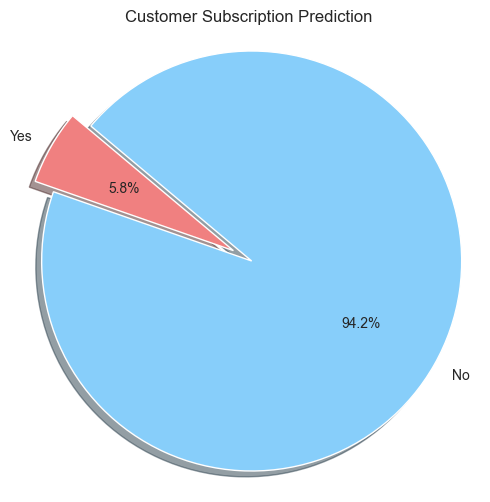

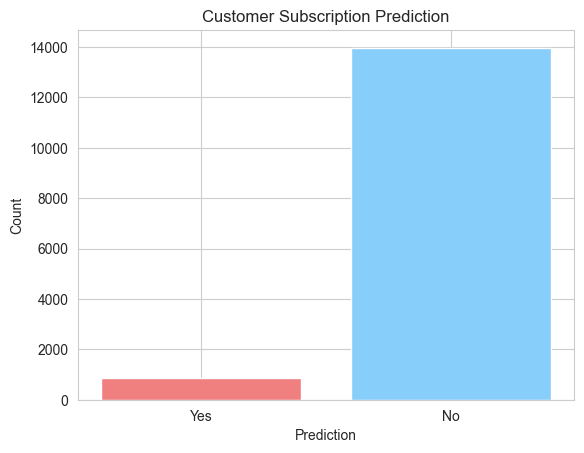

In [150]:
labels = ['Yes', 'No']
sizes = [num_yes, num_no]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # To explode the 'Yes' slice

# Creating the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Customer Subscription Prediction")
plt.show()
# Using Bar Chart:

# python
# Copy code
import matplotlib.pyplot as plt

# Assuming you have made predictions and stored them in the variable 'predictions'
num_yes = sum(predictions)  # Counting the number of 'yes' predictions
num_no = len(predictions) - num_yes  # Counting the number of 'no' predictions

# Data for the bar chart
labels = ['Yes', 'No']
counts = [num_yes, num_no]

# Creating the bar chart
plt.bar(labels, counts, color=['lightcoral', 'lightskyblue'])
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Customer Subscription Prediction')
plt.show()

In [151]:
if predictions[0] == 0:
    print("Customer will not subscribe to the new product (y='no').")
else:
    print("Customer will subscribe to the new product (y='yes').")

Customer will not subscribe to the new product (y='no').


In [152]:
len(predictions)

14825

In [153]:
len(bank_df_filtered['y']) 

44923

In [155]:
# import pandas as pd

# # Assuming you have the original dataset in a pandas DataFrame called 'original_data'
# # And you have made predictions and stored them in the variable 'predictions'

# # Add the predictions to the original dataset as a new column
# bank_df_filtered['Prediction'] = predictions

# # # Filter the dataset to get records where Prediction is 1 (y='yes')
# customers_likely_to_subscribe = bank_df_filtered[bank_df_filtered['Prediction'] == 1]

# # # Display the records of customers who are likely to subscribe to the new product
# print(customers_likely_to_subscribe)


In [156]:
from sklearn.metrics import classification_report

In [157]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     13094
           1       0.57      0.28      0.37      1731

    accuracy                           0.89     14825
   macro avg       0.74      0.63      0.66     14825
weighted avg       0.87      0.89      0.87     14825

